In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

# Data Analysis

In [3]:
os.chdir('D:/Downloads')
df = pd.read_csv('frag.csv')
df.head(20)
df.shape
df.dtypes

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


(4240, 16)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
duplicate_df = df[df.duplicated()]
duplicate_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [5]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
49,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
54,0,39,2.0,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
70,0,63,4.0,0,0.0,0.0,0,0,0,248.0,164.5,76.0,29.35,70.0,NaN,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0


D:\Softwares\Anaconda python\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E5D229F98>,
      dtype=object)

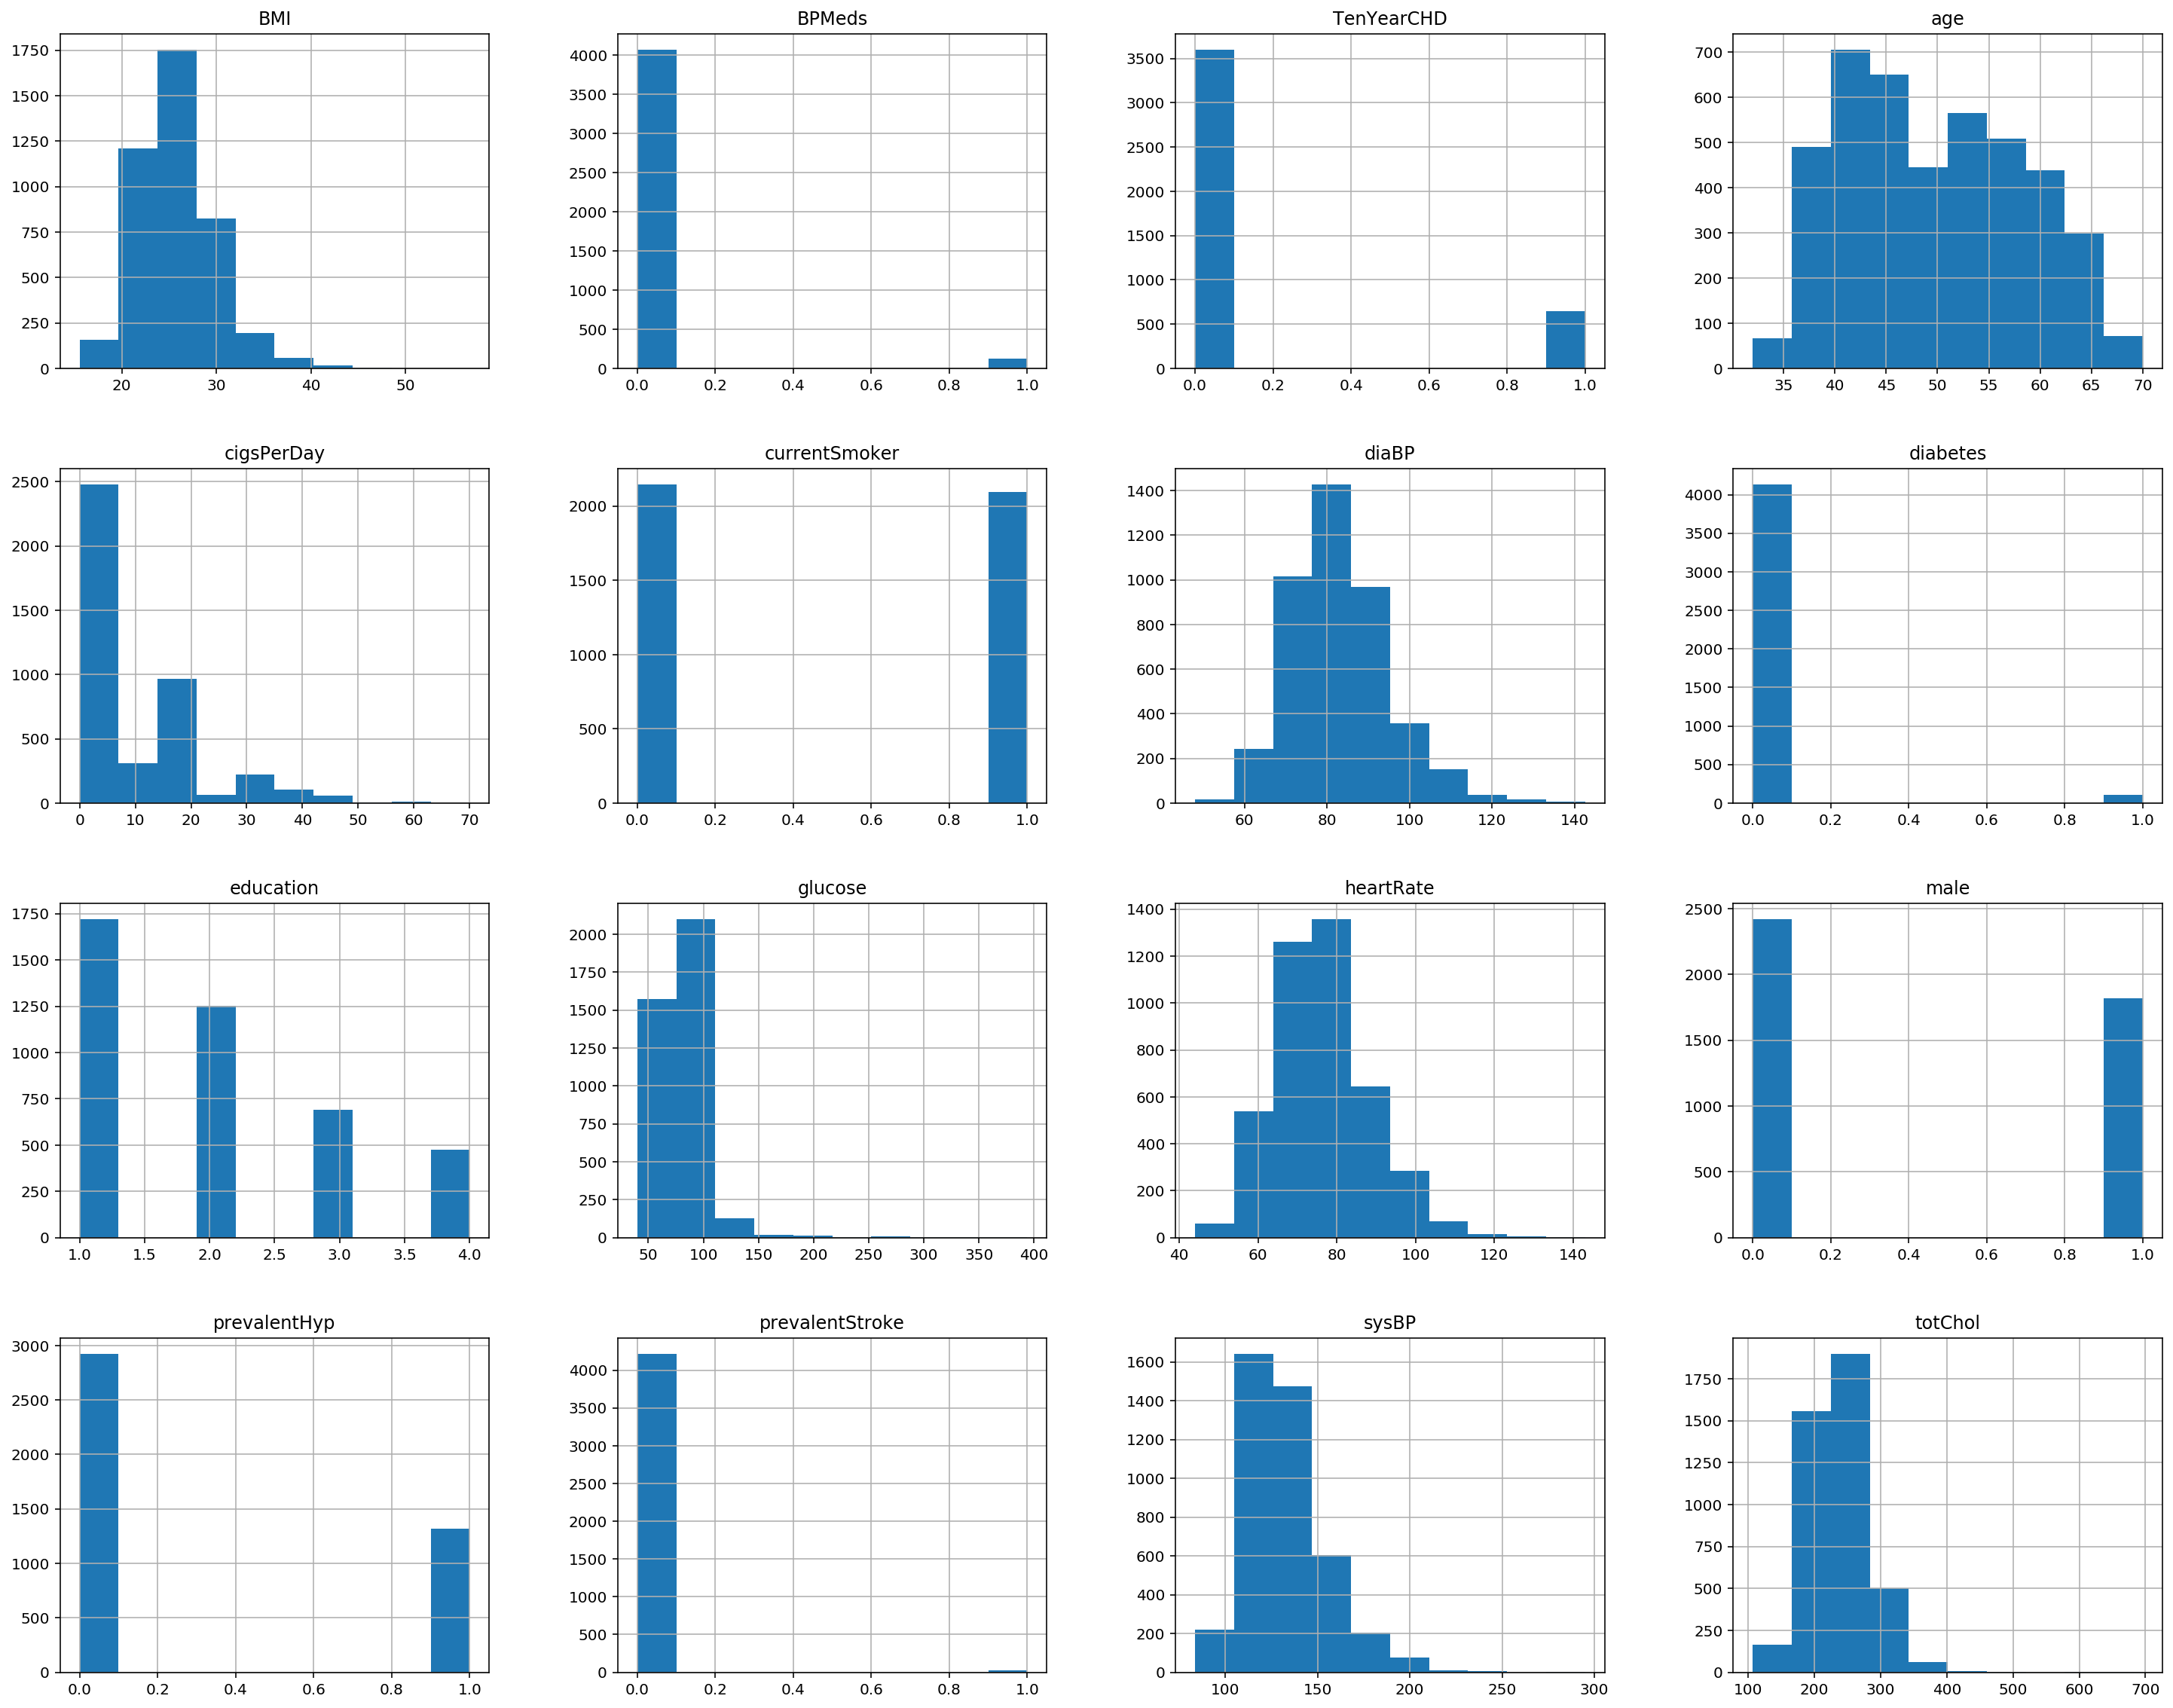

In [6]:
fig = plt.figure(figsize = (25,20))

ax = fig.gca()

df.hist(ax = ax)

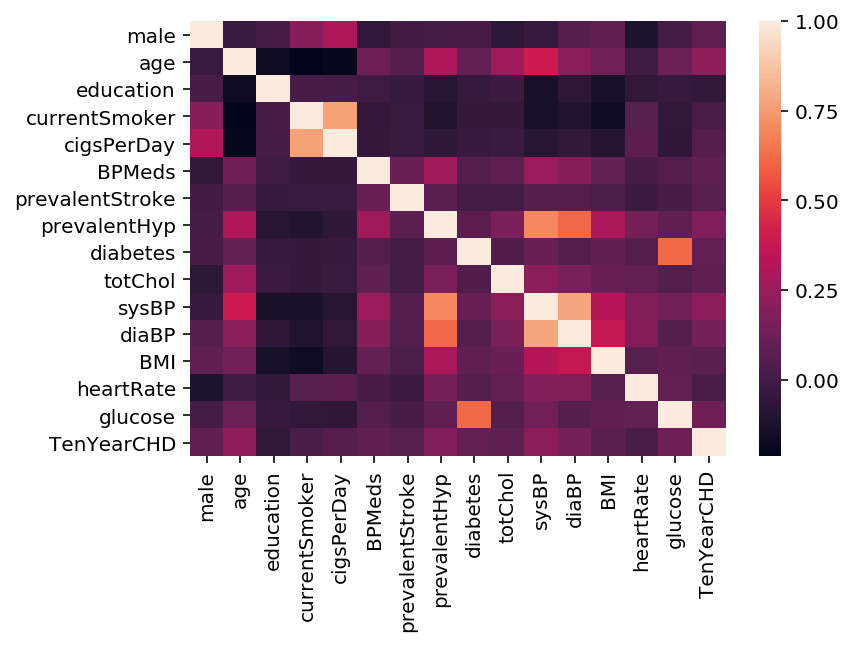

In [7]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [8]:
df = df.drop(['education','glucose'], axis=1)

In [9]:
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'TenYearCHD'],
      dtype='object')

# Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:15]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

           Specs        Score
13    TenYearCHD  3479.000000
9          sysBP   684.808068
1            age   310.610798
3     cigsPerDay   255.459035
8        totChol   223.403022
10         diaBP   150.413090
6   prevalentHyp    85.193134
7       diabetes    31.686949
4         BPMeds    29.123051
0           male    21.309482
11           BMI    15.525683


In [11]:
featureScores = featureScores.sort_values(by='Score', ascending=False)

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Importance')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text yticklabel objects>)

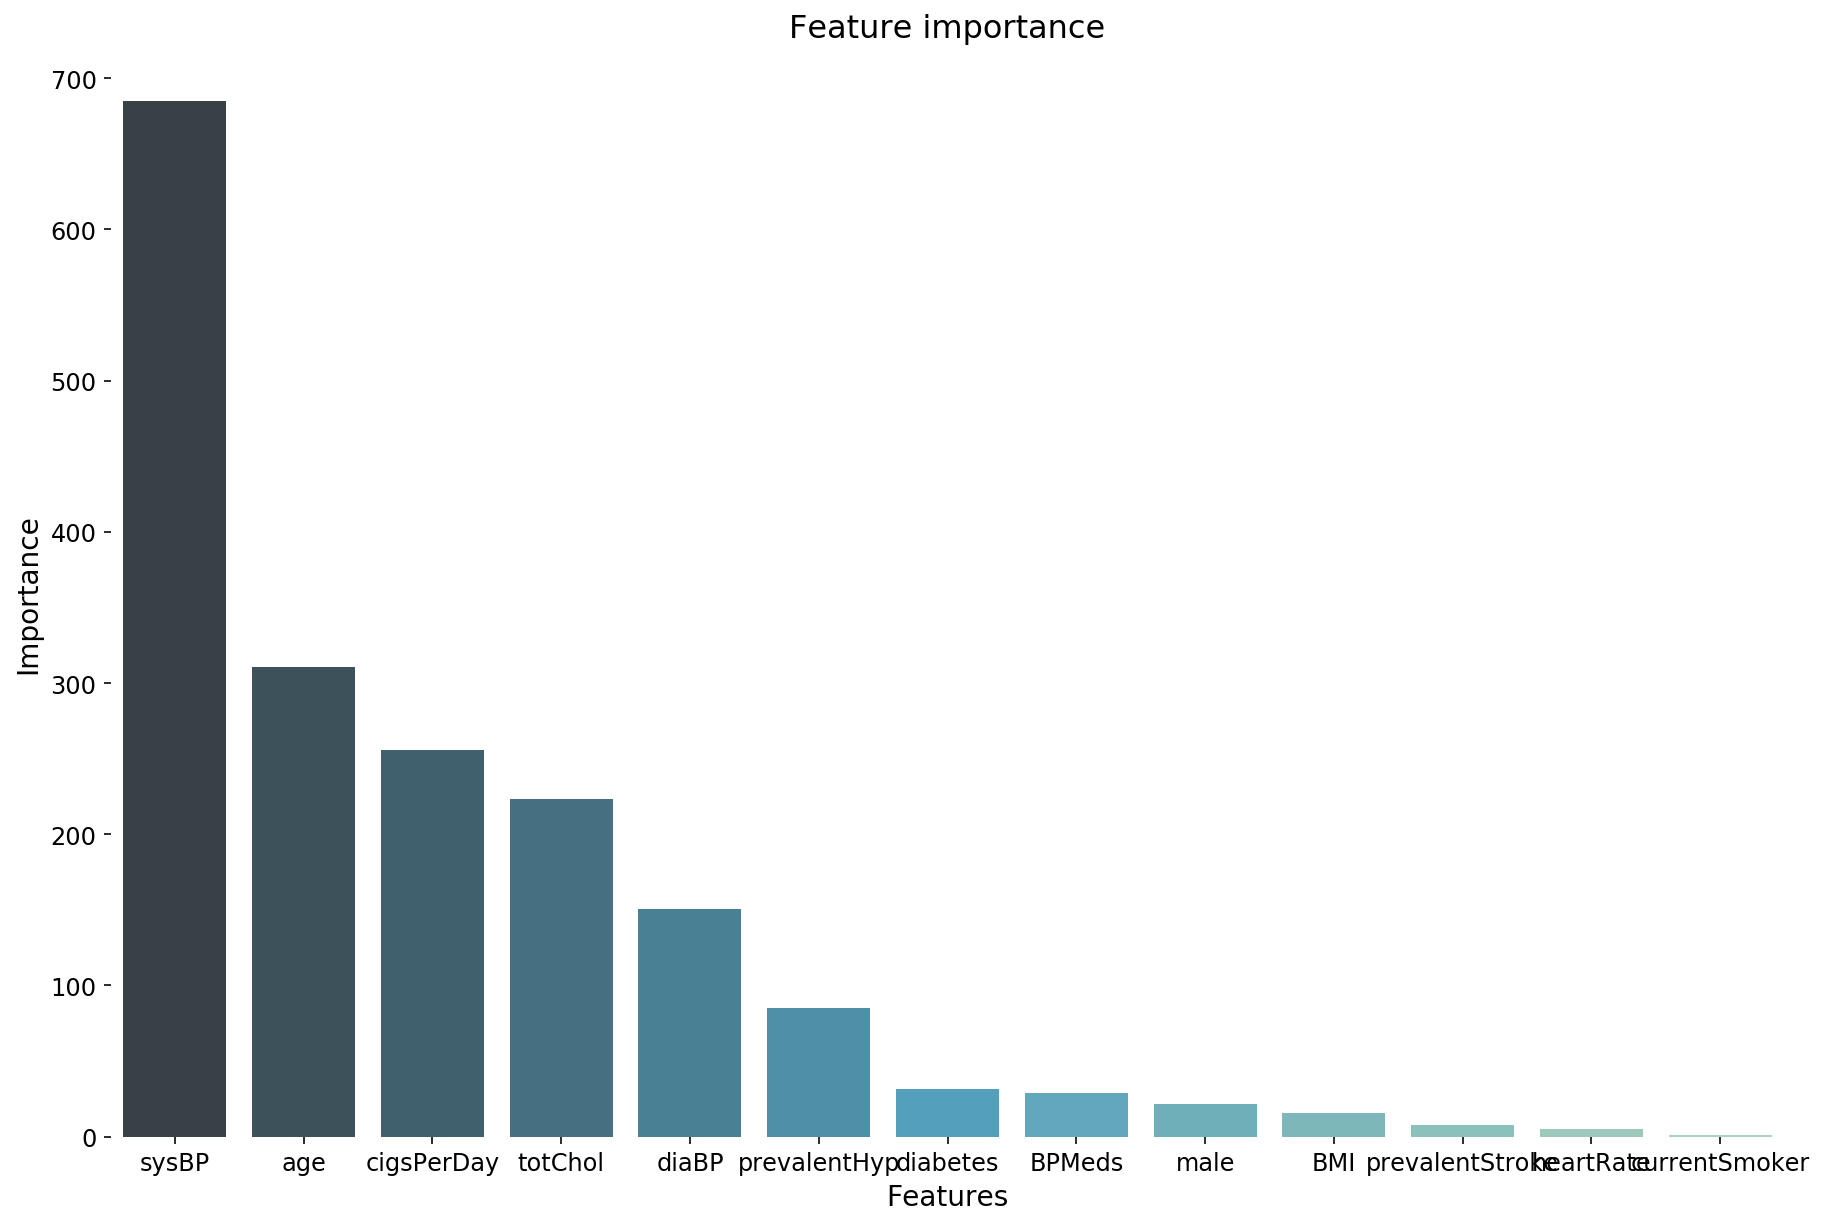

In [12]:
featureScores_feat = featureScores [1:]
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
sns.barplot(x='Specs', y='Score', data=featureScores_feat, palette = "GnBu_d")

plt.box(False)

plt.title('Feature importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
features_list = featureScores["Specs"].tolist()[:-3]
features_list

['TenYearCHD',
 'sysBP',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']

In [14]:
df = df[['sysBP','age','cigsPerDay','totChol', 'diaBP','prevalentHyp','diabetes','BPMeds','male','BMI','TenYearCHD']]
df.head()

,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
0,106.0,39,0.0,195.0,70.0,0,0,0.0,1,26.97,0
1,121.0,46,0.0,250.0,81.0,0,0,0.0,0,28.73,0
2,127.5,48,20.0,245.0,80.0,0,0,0.0,1,25.34,0
3,150.0,61,30.0,225.0,95.0,1,0,0.0,0,28.58,1
4,130.0,46,23.0,285.0,84.0,0,0,0.0,0,23.10,0


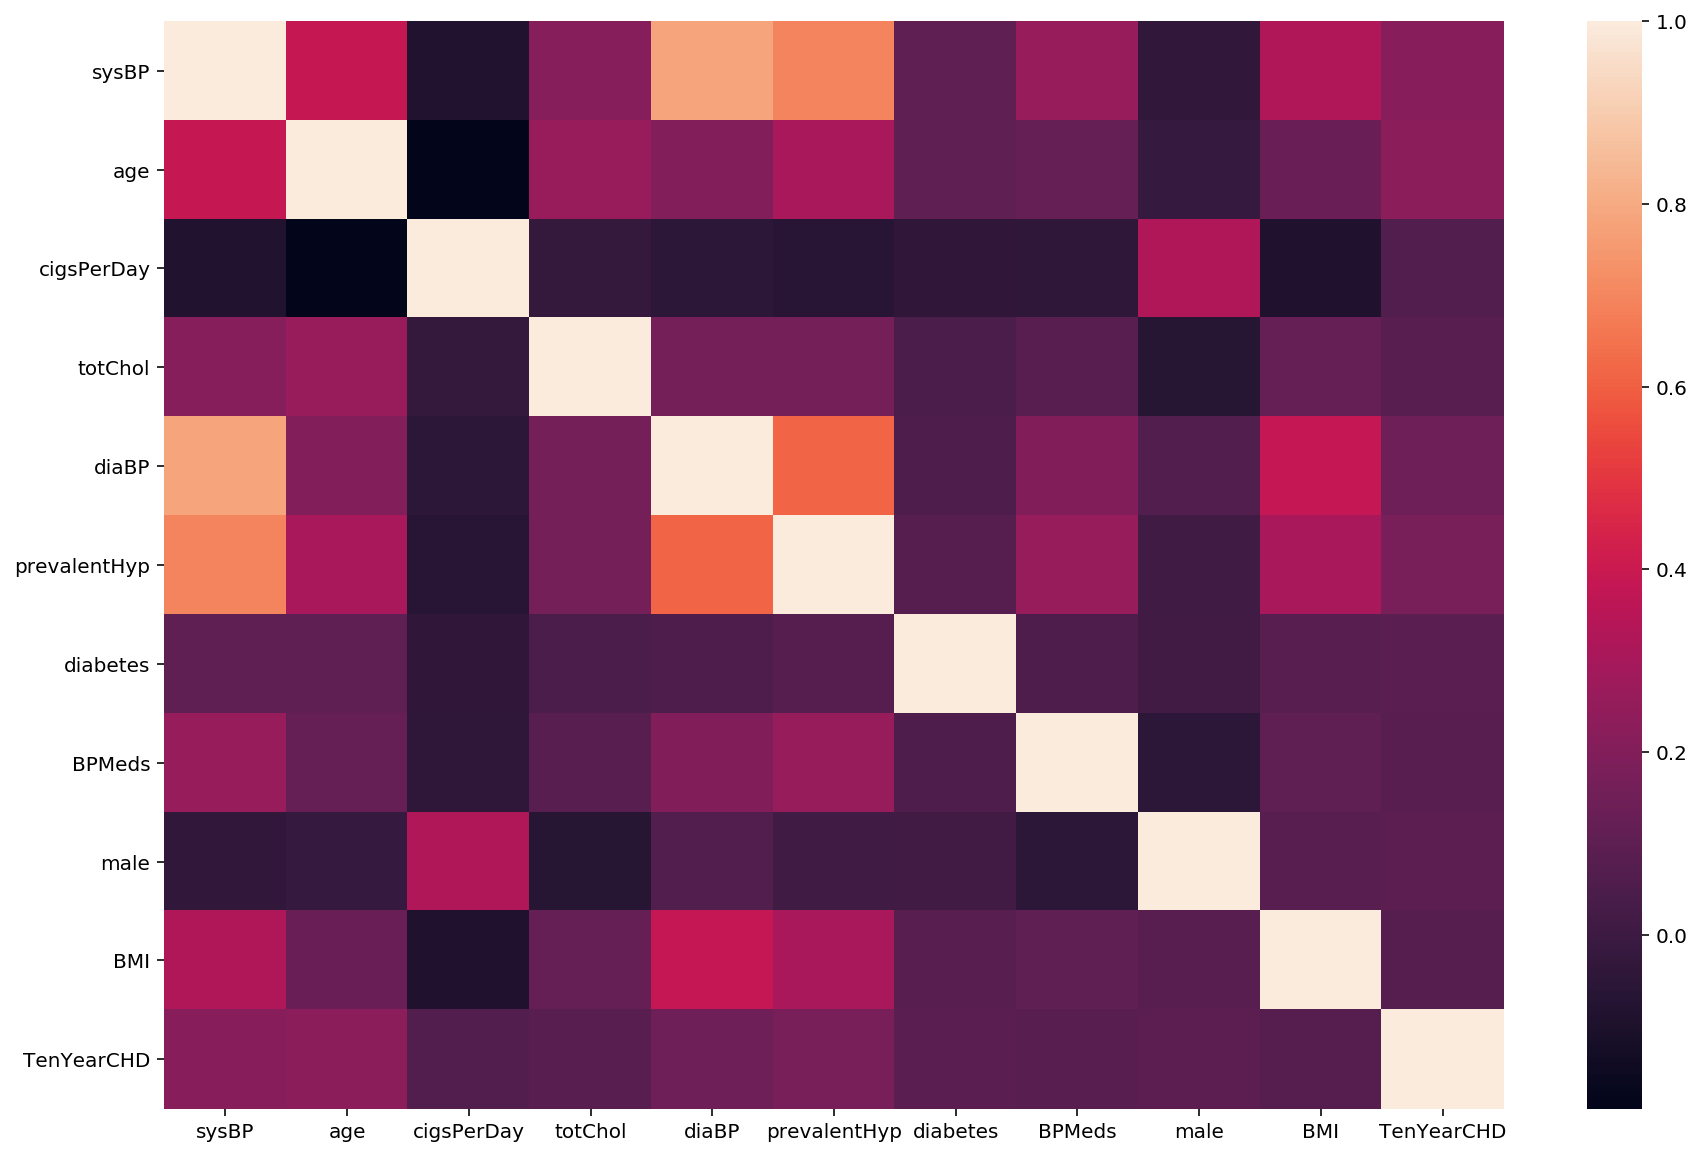

In [15]:
df_corr = df.corr()
sns.heatmap(df_corr)


,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,132.226528,49.499511,8.995355,236.659658,82.892665,0.309291,0.025428,0.029340,0.434719,25.797645,0.149389
std,21.901522,8.542193,11.913388,44.467756,11.839483,0.462258,0.157440,0.168778,0.495781,4.077631,0.356515
min,83.500000,32.000000,0.000000,113.000000,48.000000,0.000000,0.000000,0.000000,0.000000,15.540000,0.000000
25%,117.000000,42.000000,0.000000,206.000000,75.000000,0.000000,0.000000,0.000000,0.000000,23.070000,0.000000
50%,128.000000,49.000000,0.000000,234.000000,82.000000,0.000000,0.000000,0.000000,0.000000,25.400000,0.000000
75%,143.500000,56.000000,20.000000,263.000000,89.500000,1.000000,0.000000,0.000000,1.000000,28.040000,0.000000
max,295.000000,70.000000,70.000000,696.000000,142.500000,1.000000,1.000000,1.000000,1.000000,56.800000,1.000000


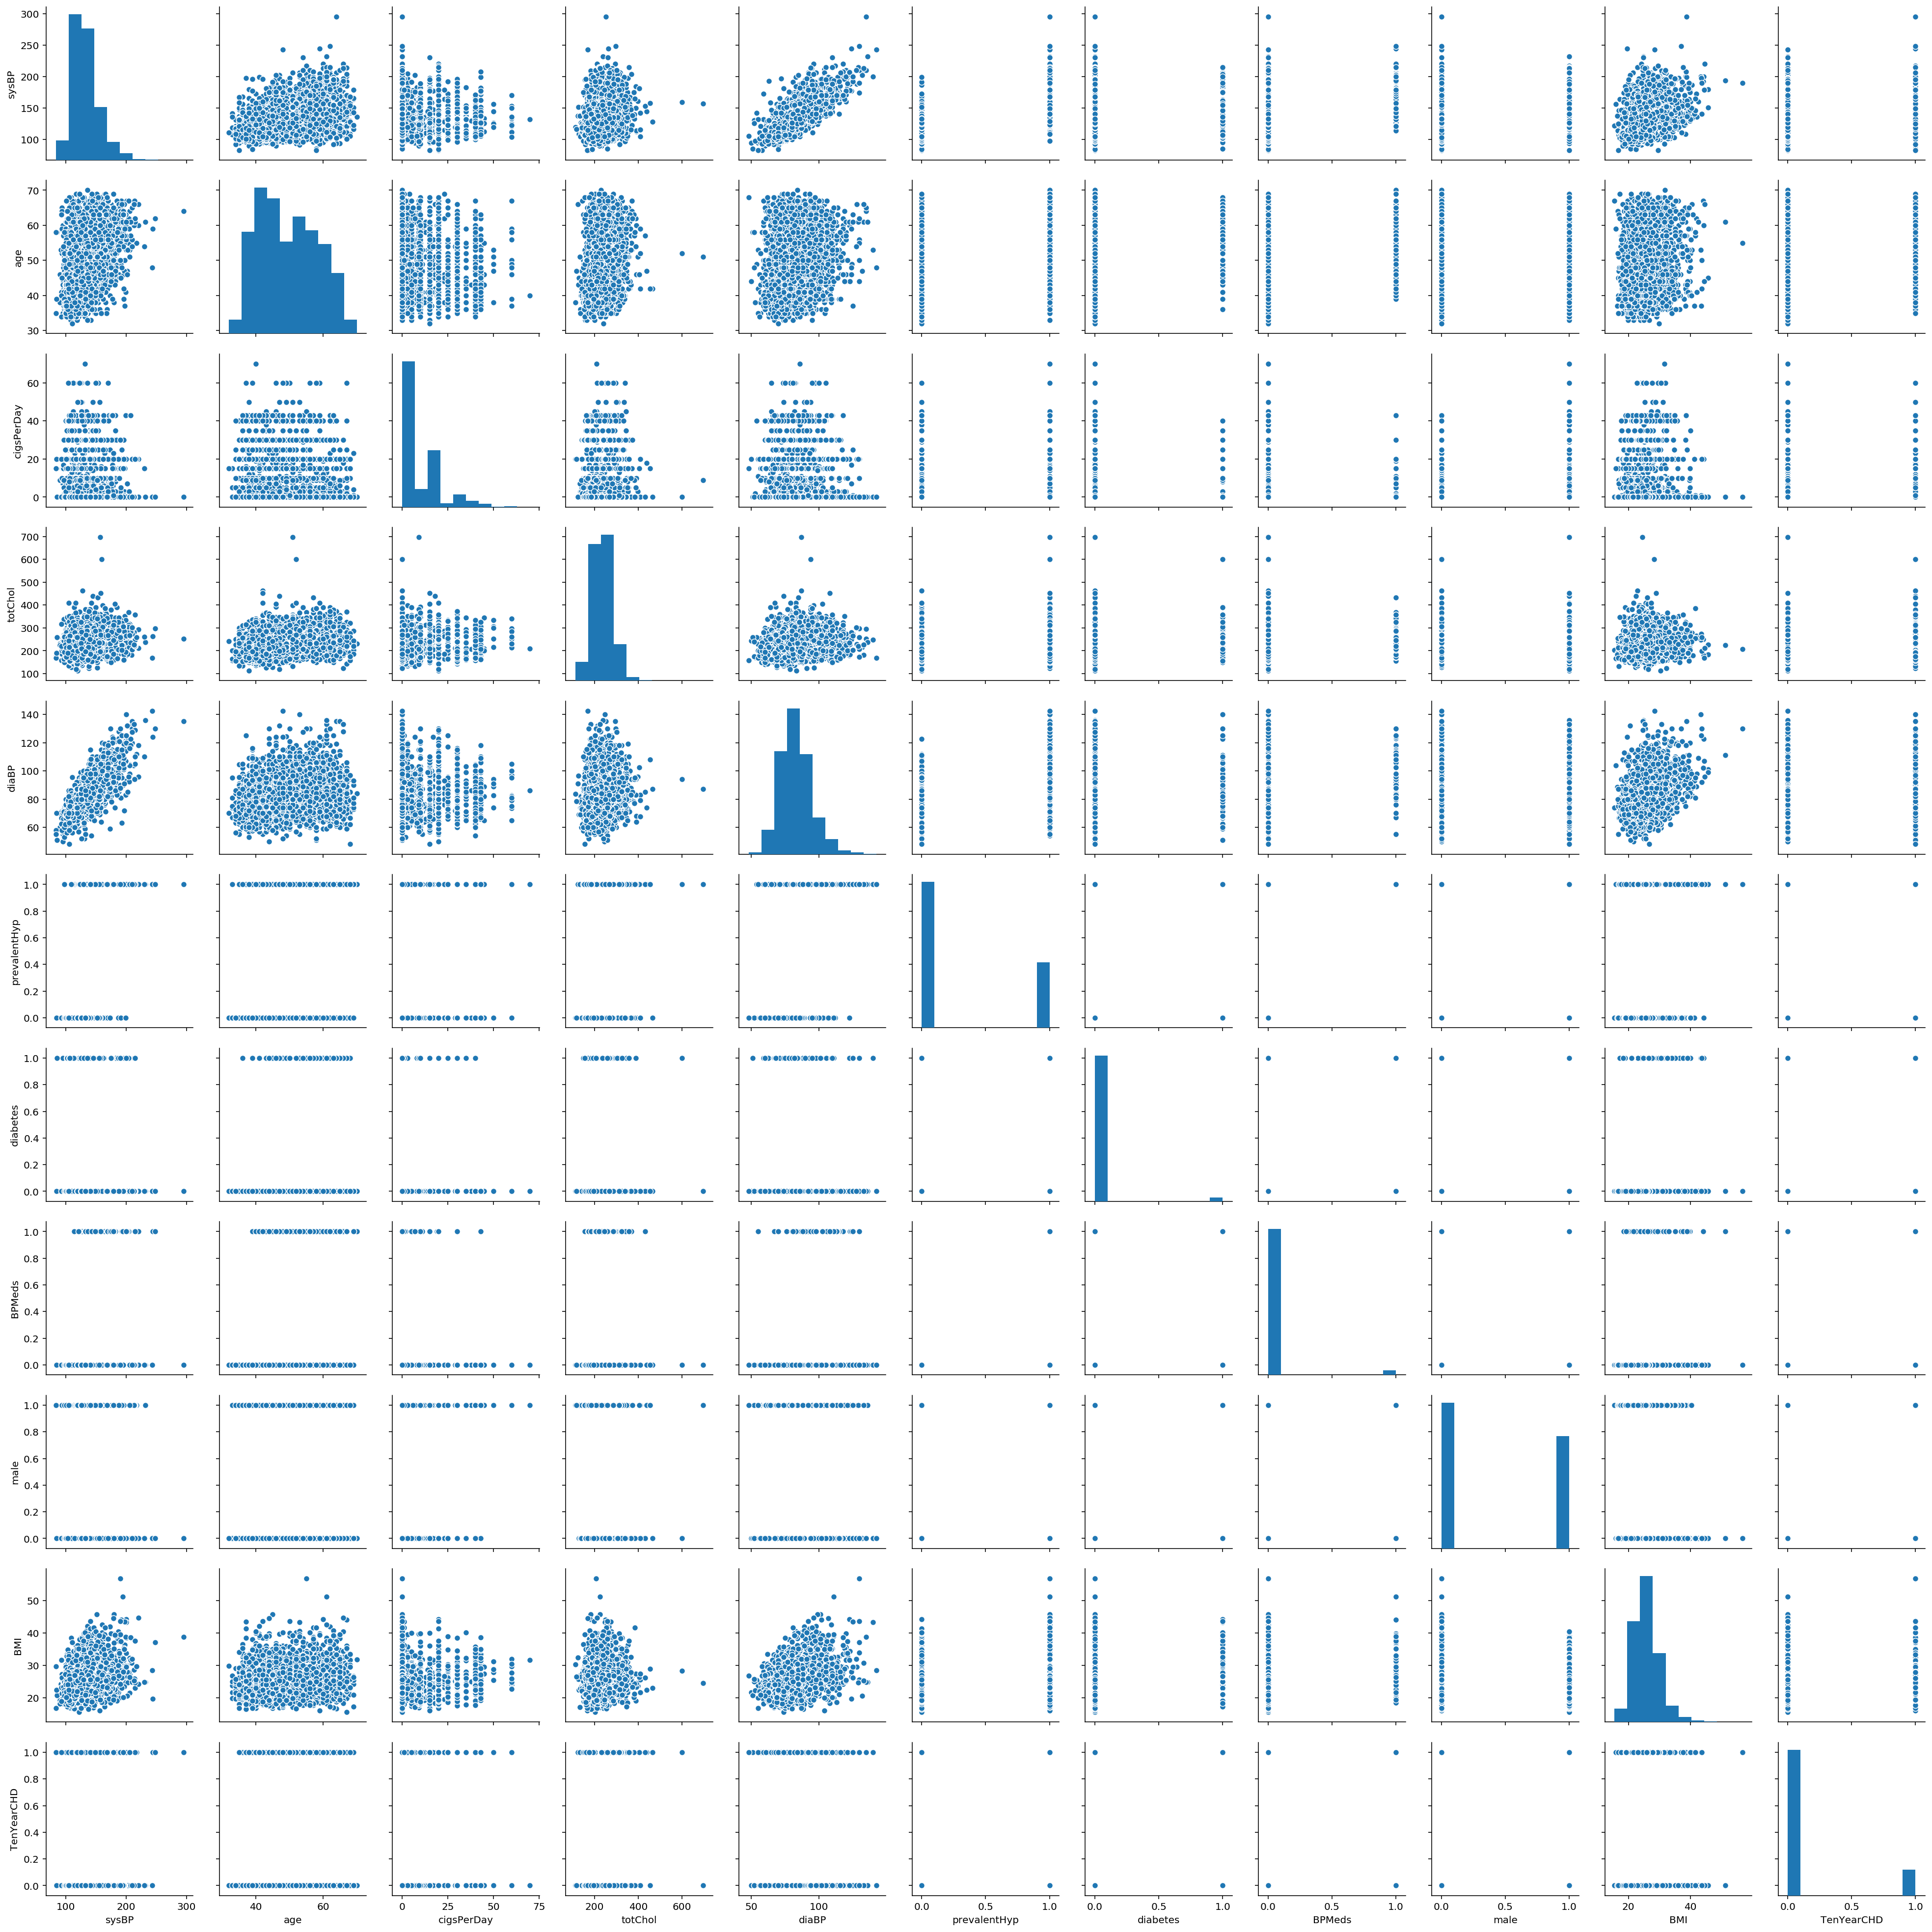

In [16]:
df.describe()
sns.pairplot(df)

,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
1111,159.5,52,0.0,600.0,94.0,1,1,0.0,0,28.27,1
3160,157.0,51,9.0,696.0,87.0,1,0,0.0,1,24.44,0


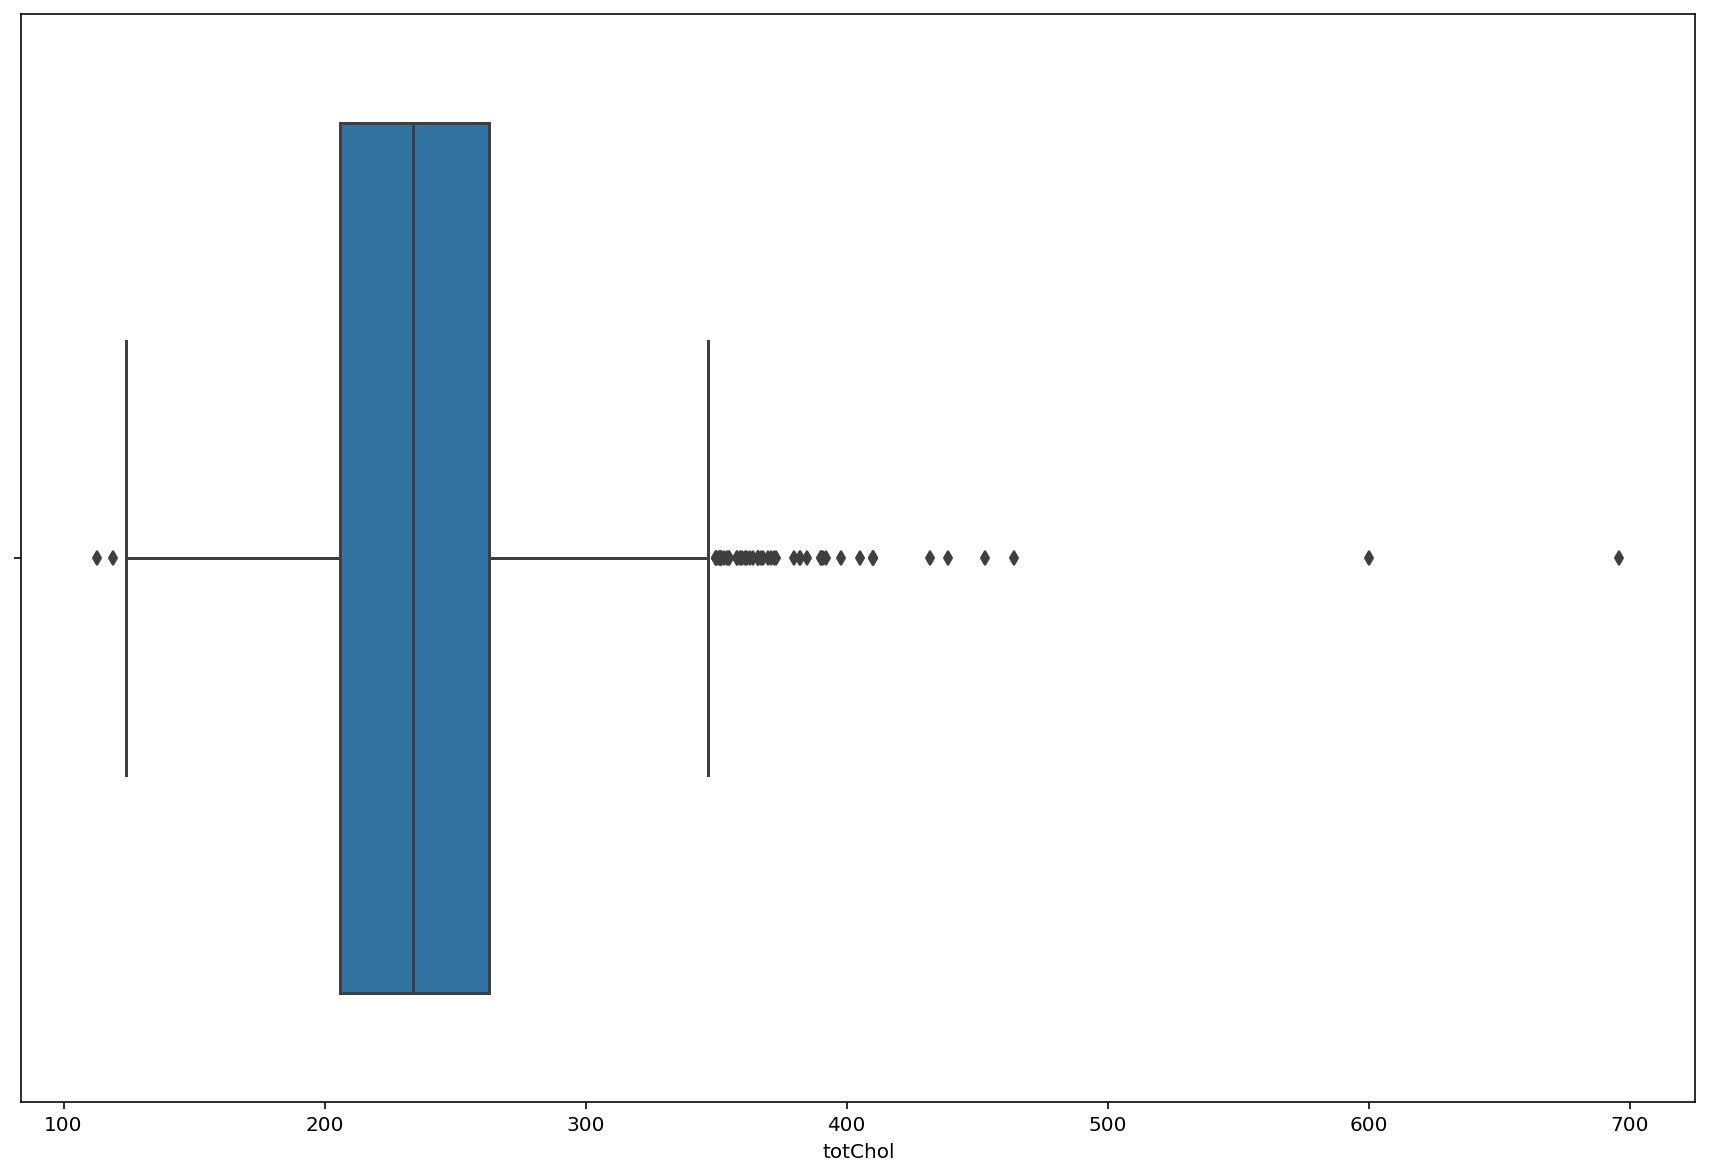

In [17]:
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers


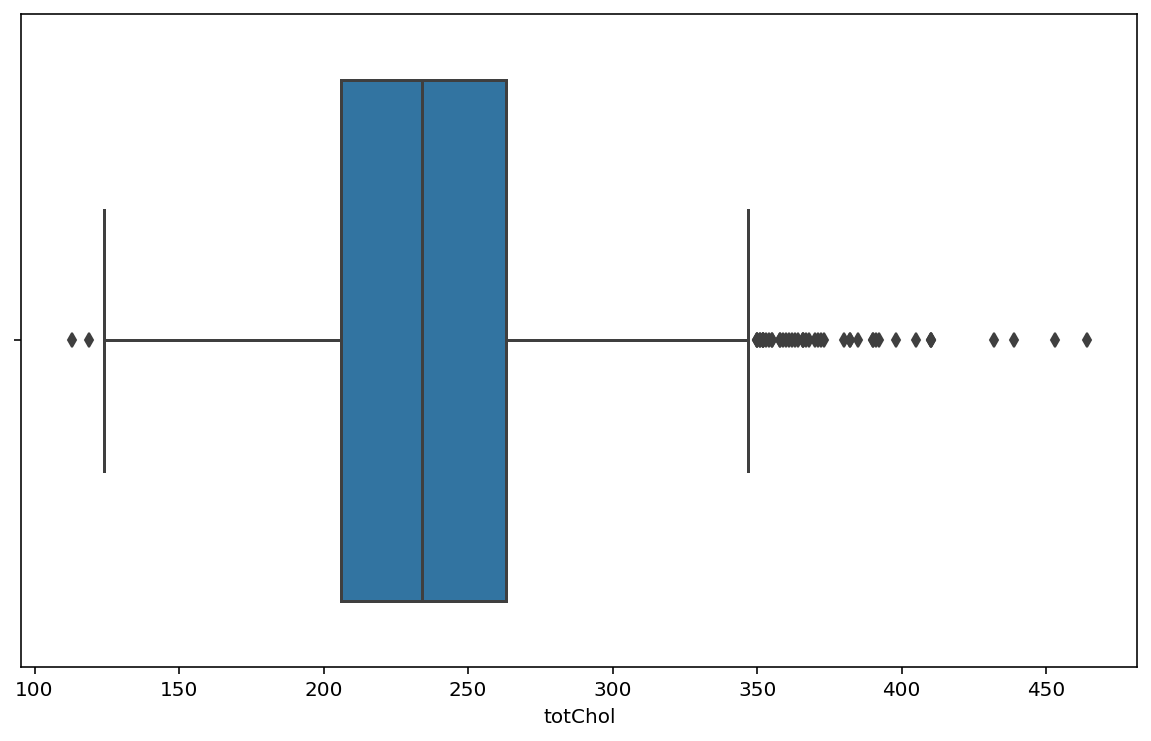

In [18]:
df = df.drop(df[df.totChol > 599].index)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
sns.boxplot(df.totChol)

# Feature Scaling

In [19]:
scaler = MinMaxScaler(feature_range=(0,1)) 
df_clean = df


df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [20]:
df_scaled.describe()
df.describe()

,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,0.230325,0.460488,0.128536,0.351733,0.369195,0.308953,0.025196,0.029354,0.434687,0.248603,0.149217
std,0.103543,0.224846,0.170221,0.124001,0.125301,0.462118,0.156738,0.168818,0.495776,0.098846,0.356346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158392,0.263158,0.000000,0.264957,0.285714,0.000000,0.000000,0.000000,0.000000,0.182501,0.000000
50%,0.210402,0.447368,0.000000,0.344729,0.359788,0.000000,0.000000,0.000000,0.000000,0.238972,0.000000
75%,0.283688,0.631579,0.285714,0.427350,0.439153,1.000000,0.000000,0.000000,1.000000,0.302957,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,132.213796,49.498532,8.997554,236.458415,82.888943,0.308953,0.025196,0.029354,0.434687,25.797373,0.149217
std,21.899294,8.544161,11.915472,43.524492,11.840930,0.462118,0.156738,0.168818,0.495776,4.078390,0.356346
min,83.500000,32.000000,0.000000,113.000000,48.000000,0.000000,0.000000,0.000000,0.000000,15.540000,0.000000
25%,117.000000,42.000000,0.000000,206.000000,75.000000,0.000000,0.000000,0.000000,0.000000,23.070000,0.000000
50%,128.000000,49.000000,0.000000,234.000000,82.000000,0.000000,0.000000,0.000000,0.000000,25.400000,0.000000
75%,143.500000,56.000000,20.000000,263.000000,89.500000,1.000000,0.000000,0.000000,1.000000,28.040000,0.000000
max,295.000000,70.000000,70.000000,464.000000,142.500000,1.000000,1.000000,1.000000,1.000000,56.800000,1.000000


# Test-Train Split

In [21]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [22]:
len(X_train)
len(X_test)

3270

818

Class 0: 3478
Class 1: 610
Proportion: 5.7 : 1


Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

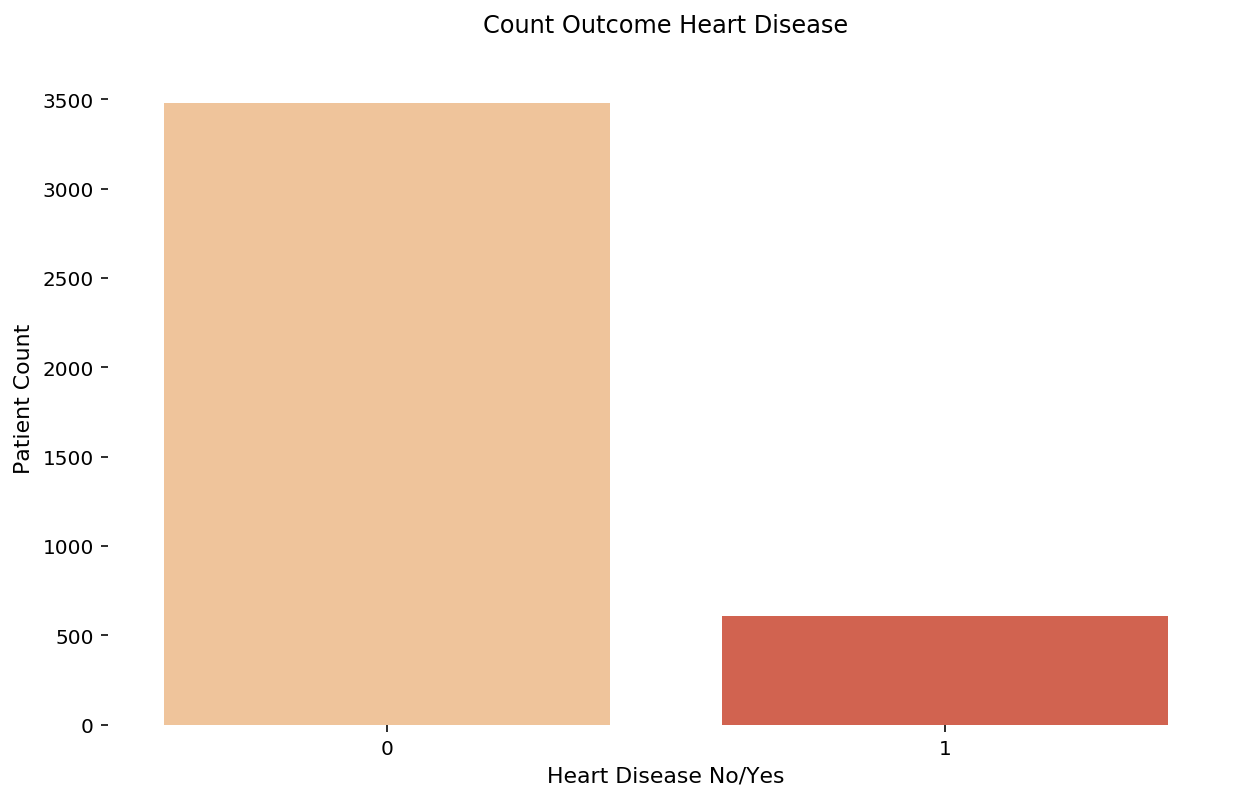

In [23]:
target_count = df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

sns.countplot(df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

# Sampling

0.0    611
1.0    610
Name: TenYearCHD, dtype: int64

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

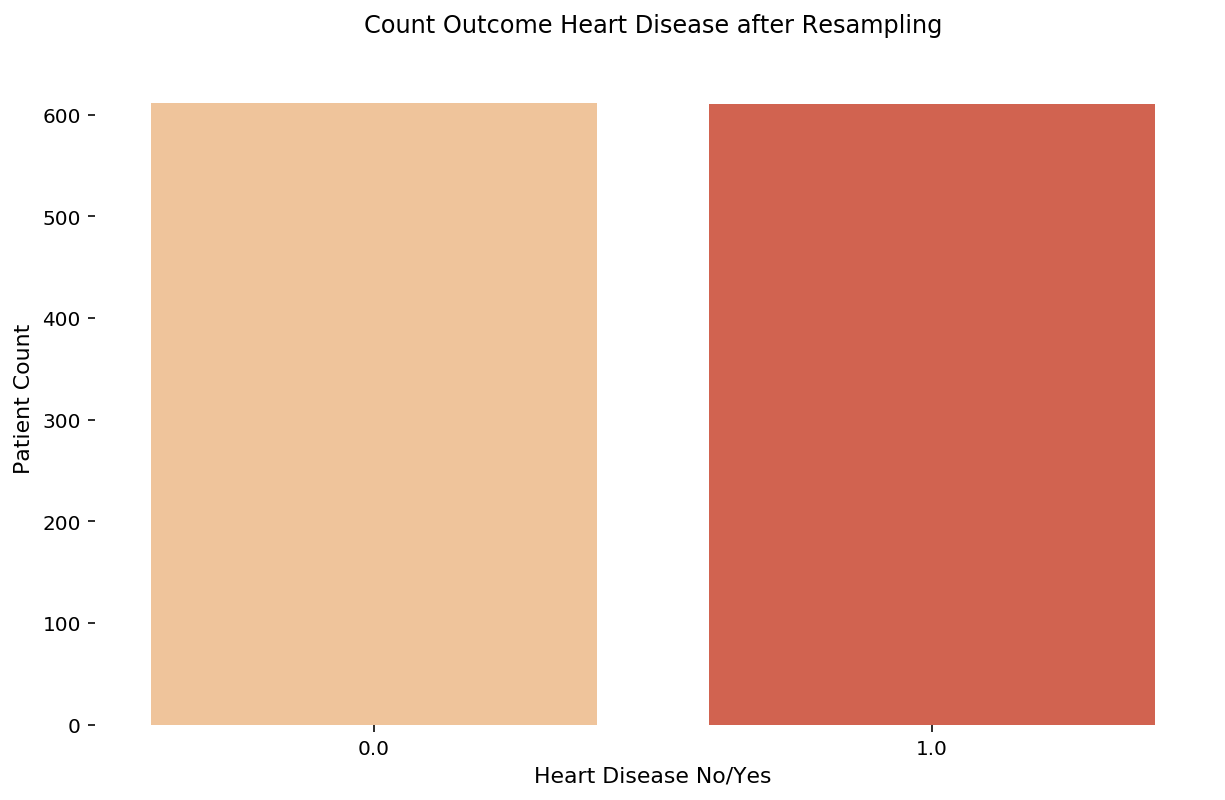

In [24]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)
normalized_df = pd.concat([CHD_df, non_CHD_df])
normalized_df.TenYearCHD.value_counts()
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')

plt.show()

# Pipelining

In [25]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

D:\Softwares\Anaconda python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.661


D:\Softwares\Anaconda python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.643


Pipeline(memory=None,
         steps=[('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.708


Pipeline(memory=None,
         steps=[('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))],
         verbose=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
model score: 0.809


# Logistic Regression

In [26]:
normalized_df.describe()

,sysBP,age,cigsPerDay,totChol,diaBP,prevalentHyp,diabetes,BPMeds,male,BMI,TenYearCHD
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,0.253551,0.515087,0.143887,0.359565,0.387608,0.389844,0.037674,0.045864,0.491400,0.257657,0.499590
std,0.115659,0.227932,0.181729,0.127937,0.136287,0.487915,0.190485,0.209276,0.500131,0.100877,0.500205
min,0.000000,0.026316,0.000000,0.017094,0.000000,0.000000,0.000000,0.000000,0.000000,0.010179,0.000000
25%,0.172577,0.315789,0.000000,0.270655,0.296296,0.000000,0.000000,0.000000,0.000000,0.192196,0.000000
50%,0.229314,0.526316,0.014286,0.356125,0.370370,0.000000,0.000000,0.000000,0.000000,0.245759,0.000000
75%,0.314421,0.710526,0.285714,0.435897,0.465608,1.000000,0.000000,0.000000,1.000000,0.315802,1.000000
max,1.000000,0.973684,1.000000,1.000000,0.973545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 66.10000000000001%
The f1 score for LogReg is: 39.4%
The precision score for LogReg is: 27.6%
The recall score for LogReg is: 68.7%


D:\Softwares\Anaconda python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

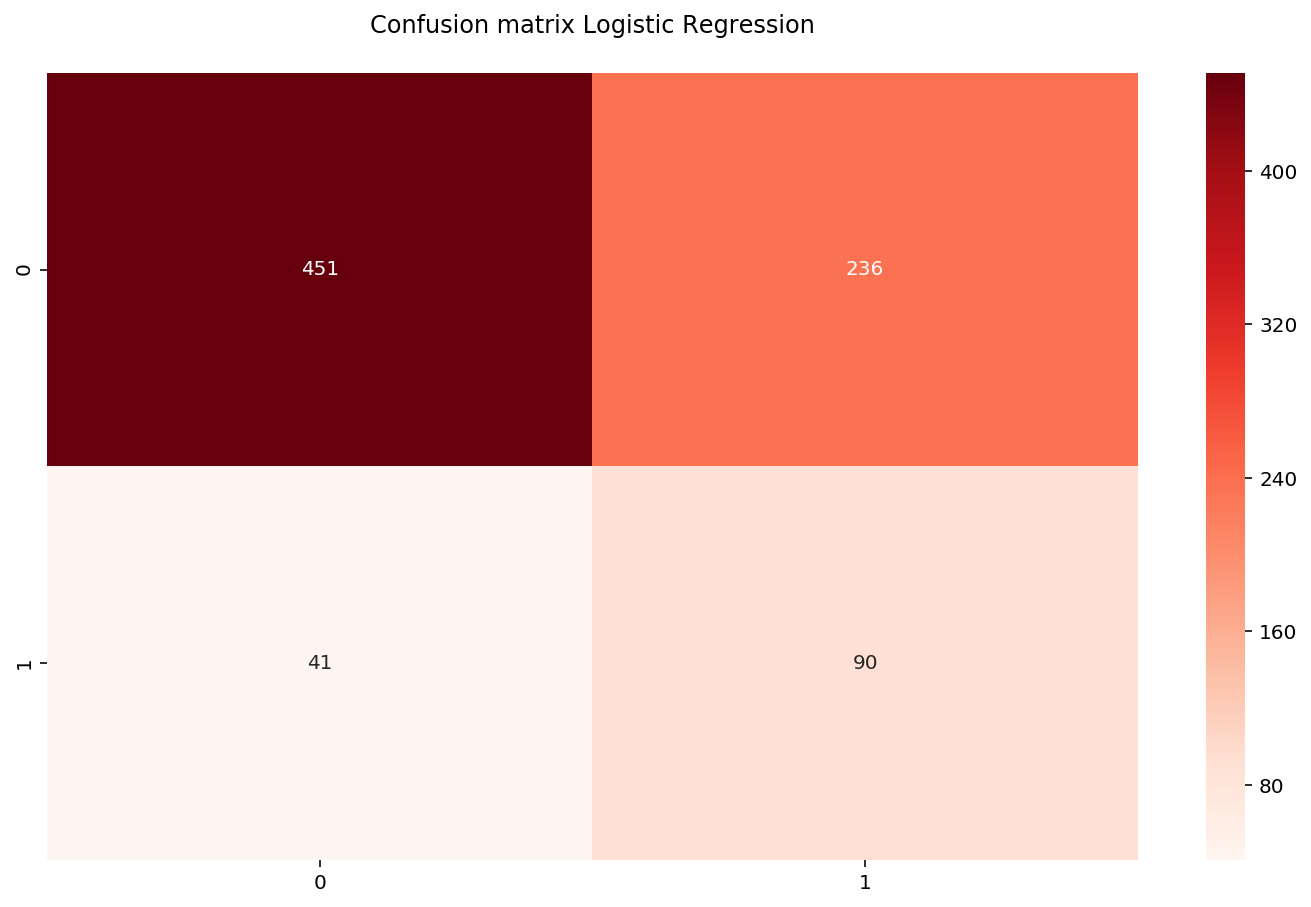

In [28]:
cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

# SVM

In [29]:
svm = SVC()
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

D:\Softwares\Anaconda python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

The accuracy score for SVM is: 64.3%
The f1 score for SVM is: 37.1%
The precision score for SVM is: 25.8%
The recall score for SVM is: 65.60000000000001%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

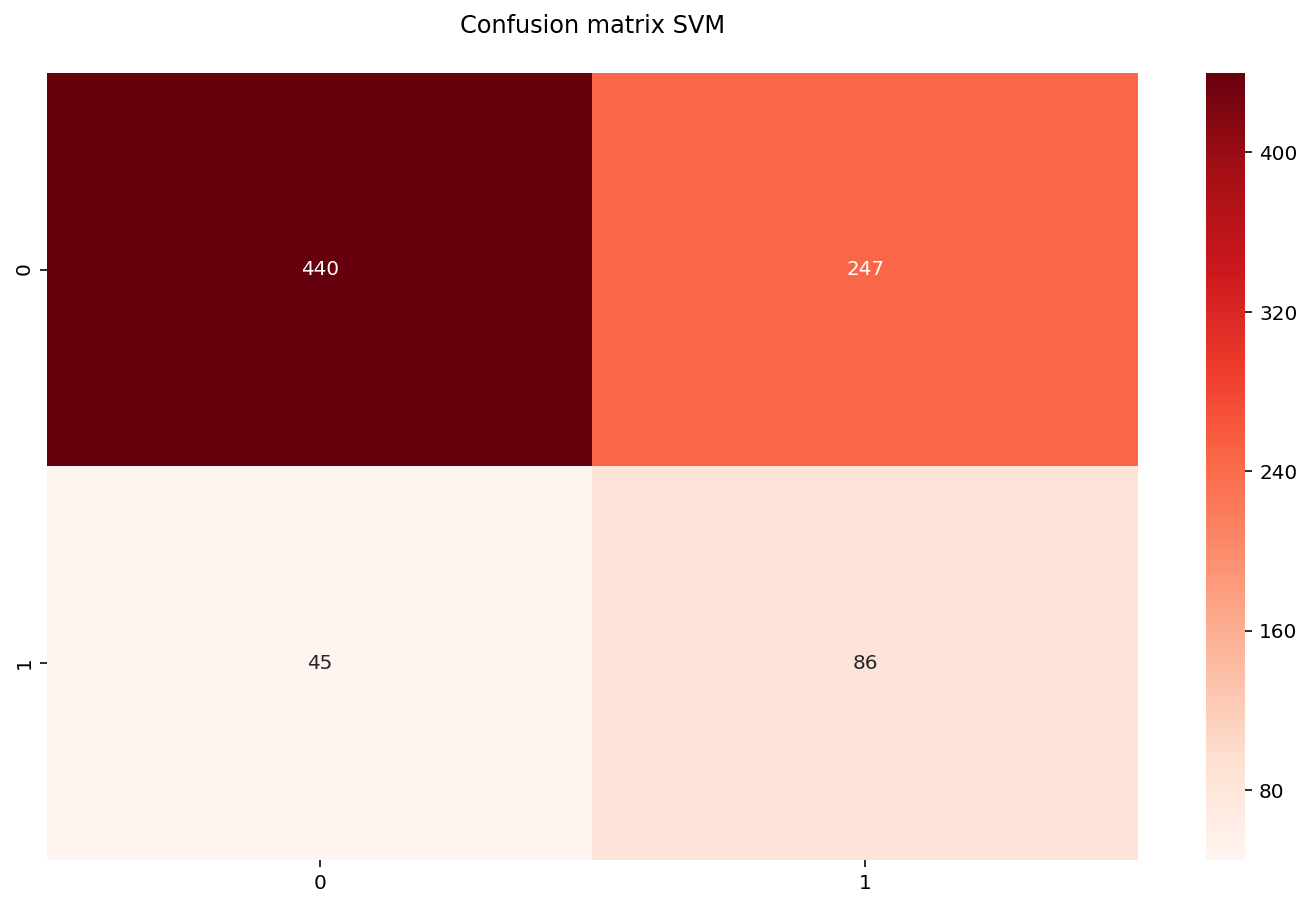

In [30]:
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

# Decision Tree

In [31]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The accuracy score for DTC is: 71.1%
The f1 score for DTC is: 52.6%
The precision score for DTC is: 35.699999999999996%
The recall score for DTC is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

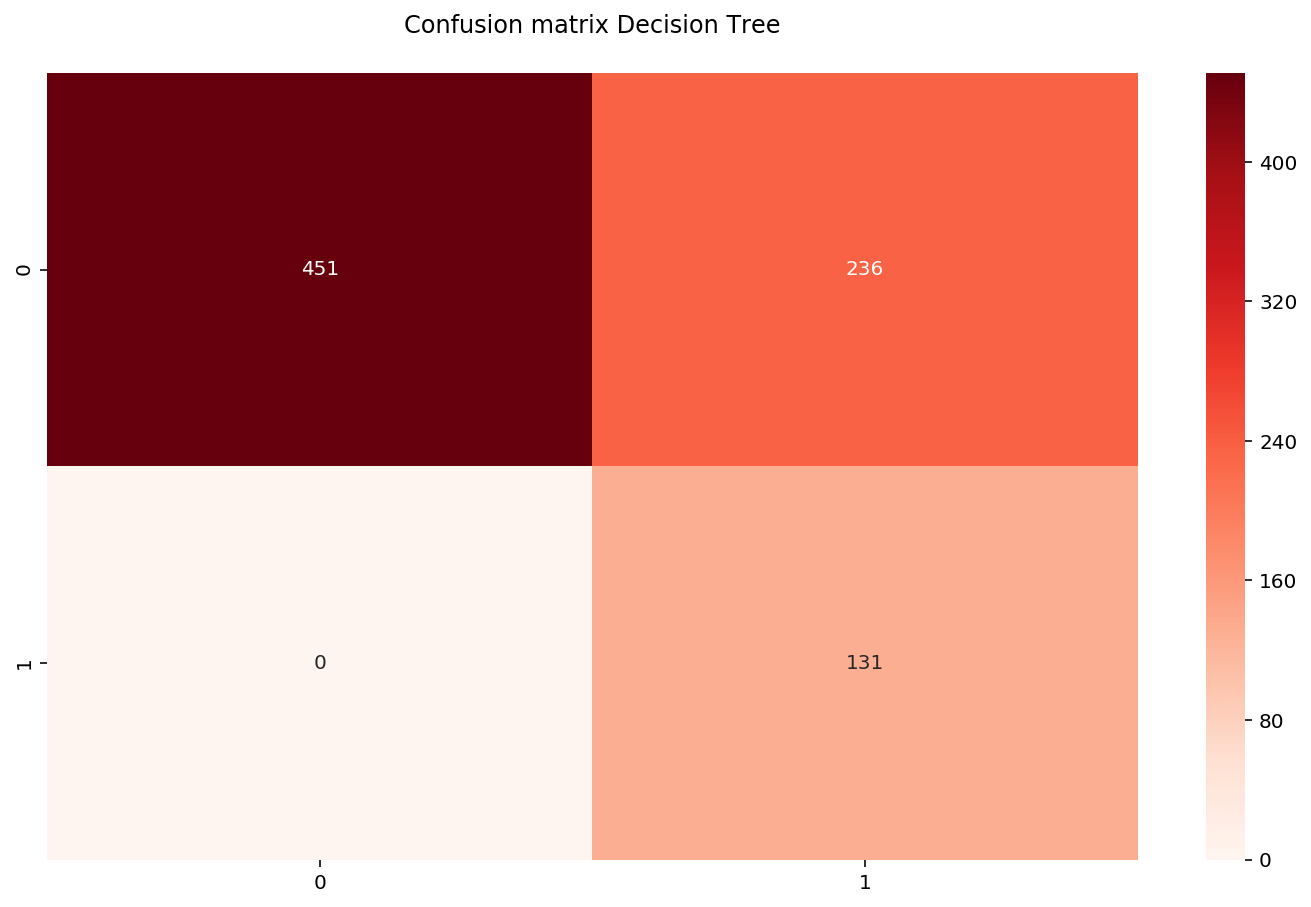

In [32]:
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

# KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

normalized_df_knn_pred = knn.predict(X_test)

acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

print(f"The precision score for KNN is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

The accuracy score for KNN is: 80.9%
The f1 score for KNN is: 51.6%
The precision score for KNN is: 35.699999999999996%
The recall score for KNN is: 63.4%


In [34]:
acc_test = knn.score(X_test, y_test)
acc_test
acc_train = knn.score(X_train, y_train)
acc_train

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

0.8092909535452323

0.7854217854217854

Cross-validated scores: [0.83007335 0.83740831 0.83740831 0.84700122 0.82619339]
Accuracy: 0.84 (+/- 0.01)


Text(0.5, 1.1, 'Confusion matrix KNN\n')

Text(0.5, 33.0, 'Predicted ')

Text(69.0, 0.5, 'True')

[Text(0.5, 0, 'No Heart Disease'), Text(1.5, 0, 'Heart Disease')]

[Text(0, 0.5, 'Heart Disease'), Text(0, 1.5, 'No Heart Disease')]

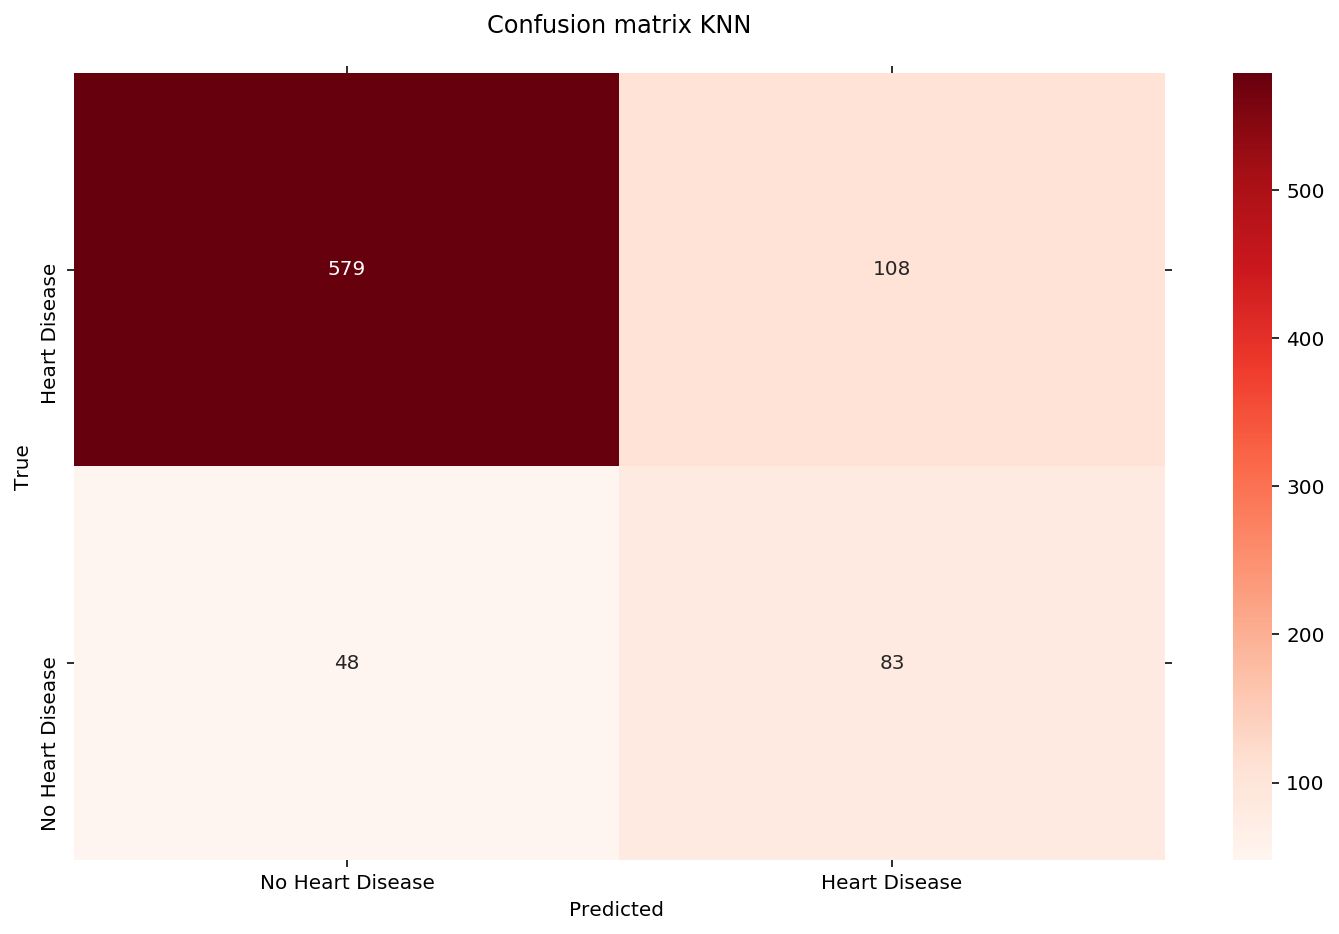

In [35]:
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

plt.tight_layout()
plt.title('Confusion matrix KNN\n', y=1.1)

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 
ax.xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease']); ax.yaxis.set_ticklabels(['Heart Disease', 'No Heart Disease'])
ax.xaxis.set_ticks_position("default")
ax.yaxis.set_ticks_position('default')

rotation=45

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

rfc_up = RandomForestClassifier(max_depth=24, n_estimators=100, random_state=10)
rfc_up.fit(X_train, y_train)
pred = rfc_up.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")
f1 = f1_score(y_test, pred)
print(f"The f1 score for the RFC is: {round(f1,3)*100}%")
precision = precision_score(y_test, pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")
recall = recall_score(y_test, pred)
print(f"the recall score for RFC is : {round(recall,3)*100}%")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=24, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

The accuracy score for RFC is: 74.7%
The f1 score for the RFC is: 55.900000000000006%
The precision score for RFC is: 38.800000000000004%
the recall score for RFC is : 100.0%


Text(0.5, 1.1, 'Confusion matrix RFC\n')

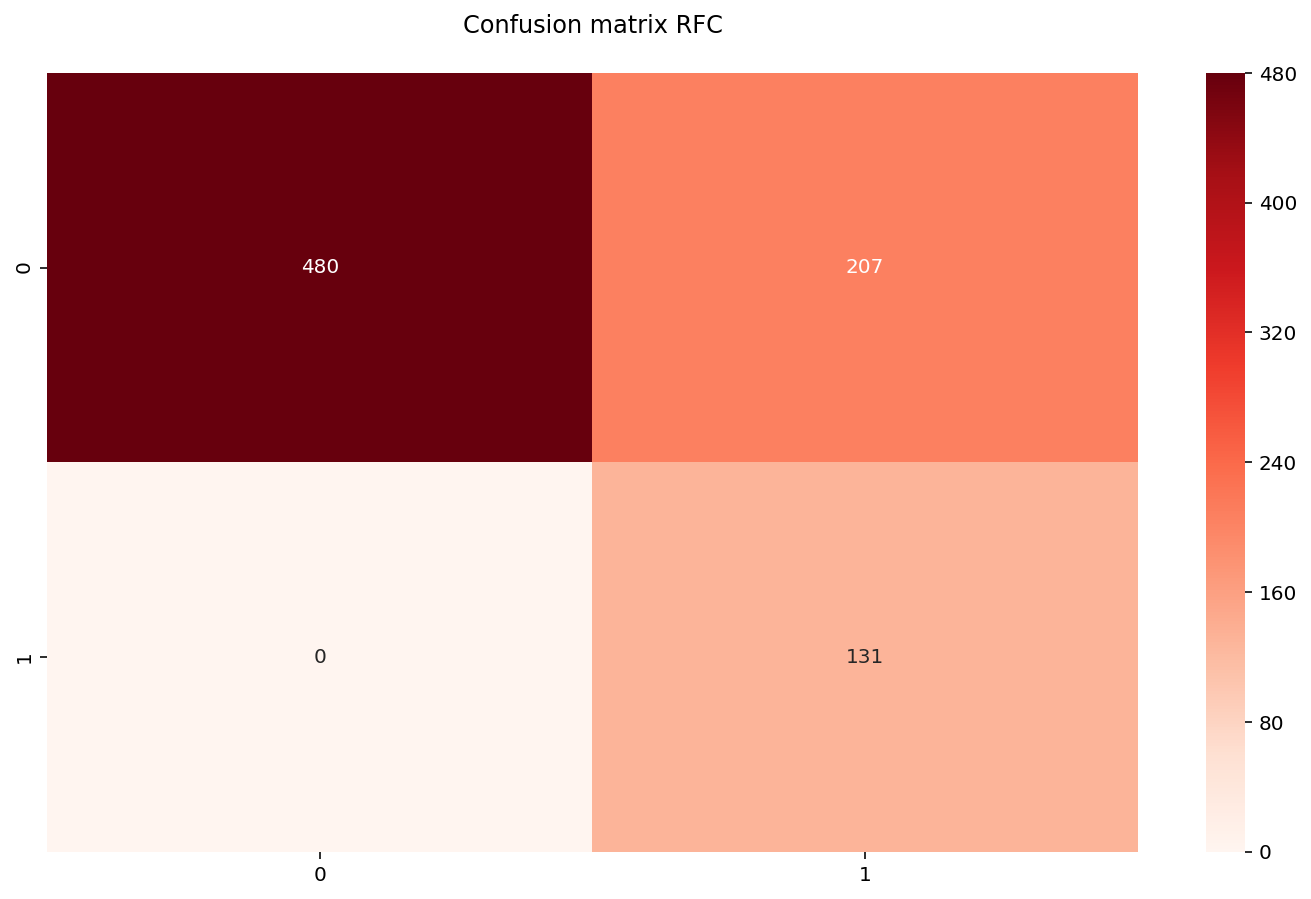

In [37]:
cnf_matrix_rfc = confusion_matrix(y_test, pred)

sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RFC\n', y=1.1)

In [38]:
acc_test1 = rfc_up.score(X_test, y_test)
acc_test1
acc_train1 = rfc_up.score(X_train, y_train)
acc_train1

cv_results1 = cross_val_score(rfc_up, X, y, cv=5) 

print ("Cross-validated scores:", cv_results1)

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results1.mean(), cv_results1.std() * 2))

0.7469437652811736

1.0

Cross-validated scores: [0.8398533  0.84229829 0.84352078 0.8494492  0.84088127]
Accuracy: 0.84 (+/- 0.01)


Text(0.5, 1.0, 'ROC CURVE KNN')

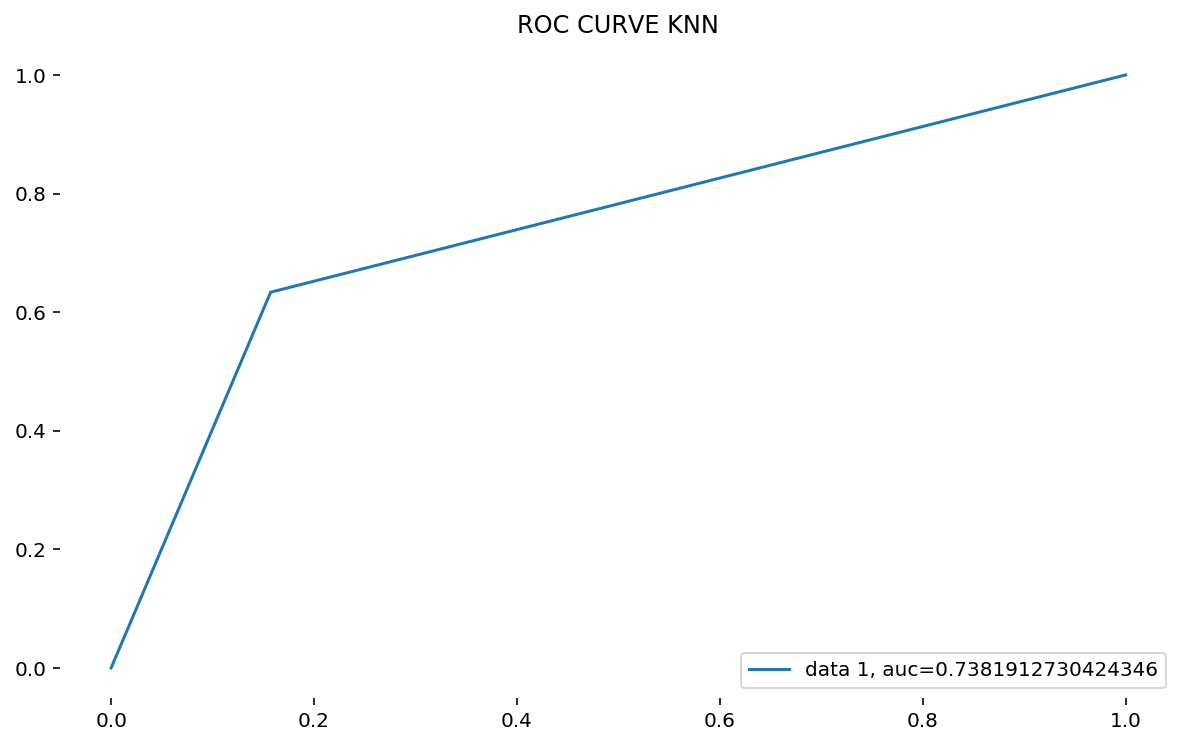

The score for the AUC ROC Curve is: 73.8%


In [39]:
fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

Text(0.5, 1.0, 'ROC CURVE Random Forest')

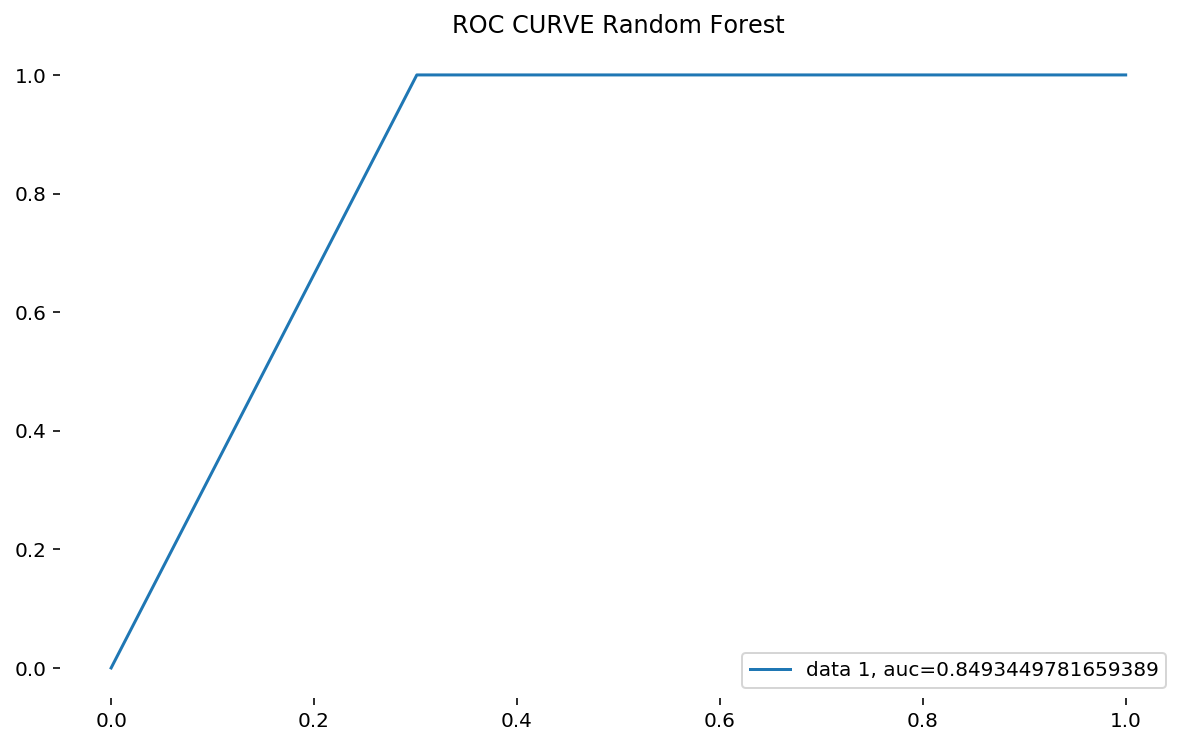

The score for the AUC ROC Curve is: 84.89999999999999%


In [40]:
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Random Forest')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")